In [ ]:
import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt
import math

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

In [ ]:
# Generate training data
x_train = np.random.uniform(0, 1, size=(1000, 2))
y_train = np.array([1. if (xi[0]**2 + xi[1]**2 <= 1) else 0 for xi in x_train]).astype('float32')

# One-hot encode the outcome variable
y_onehot = np.array([np.array([1., 0]) if (xi[0]**2 + xi[1]**2 <= 1) else np.array([0, 1.]) for xi in x_train]).astype('float32')

In [ ]:
y_onehot.shape

(1000, 2)

In [ ]:
x_train[:5]

array([[0.95416291, 0.20977099],
       [0.68159431, 0.77614815],
       [0.5061094 , 0.58841671],
       [0.91301564, 0.16554946],
       [0.62345405, 0.57045969]])

In [ ]:
y_train[:5]

array([1., 0., 1., 1., 1.], dtype=float32)

In [ ]:
y_onehot[:5]

array([[1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

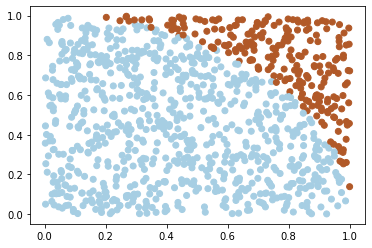

In [ ]:
# Plot data points colored according to label
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, cmap='Paired_r')

In [ ]:
# Define helper functions
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

def softmax(s):
  e = np.exp(s)
  return e / e.sum(axis=-1, keepdims=True)

def accuracy(y_true, y_pred):
  """ Compare y_true to y_pred and return the accuracy """
  accuracy = np.sum(y_true == y_pred, axis=0) / len(y_true)
  return accuracy

In [ ]:
# Test function
sigmoid(np.array([1, 0, 0.5, 0.3]))

array([0.73105858, 0.5       , 0.62245933, 0.57444252])

In [ ]:
def cross_entropy(s, y):
  """Calculate the cross-entropy loss for a given vector of logit scores"""
  return -np.dot(y, s) + np.log(1+np.sum(np.exp(y*s)))

In [ ]:
# MLP Code

class CrossEntropy():
  def __init__(self): 
    pass

  def loss(self, x, prob):
        # Avoid division by zero
        prob = np.clip(prob, 1e-15, 1 - 1e-15)
        return - x * np.log(prob) - (1 - x) * np.log(1 - prob)

  def grad(self, x, prob):
        # Avoid division by zero
        prob = np.clip(prob, 1e-6, 1 - 1e-6)
        return -(x / prob) + (1 - x) / (1 - prob)

class Softmax():
    def __call__(self, x):
        e_x = np.exp(x - np.max(x, axis=-1, keepdims=True))
        return e_x / np.sum(e_x, axis=-1, keepdims=True)

    def grad(self, x):
        p = self.__call__(x)
        return p * (1 - p)

class Sigmoid():
    def __call__(self, x):
        return 1 / (1 + np.exp(-x))

    def grad(self, x):
        return self.__call__(x) * (1 - self.__call__(x))

class MLP():
    def __init__(self, dim_hidden, n_iterations=1000, learn_rate=0.01):
        self.dim_hidden = dim_hidden
        self.n_iterations = n_iterations
        self.learn_rate = learn_rate
        self.hidden_activation = Sigmoid()
        self.output_activation = Softmax()
        self.loss = CrossEntropy()

    def sigmoid(self,x):
      return(1 / (1+np.exp(-x)))

    def init_weights(self,X,Y):
      n_samples, n_features = X.shape
      n_outputs = Y.shape[1]

      # Hidden layer
      init_limit = 1 / math.sqrt(n_features)
      self.W1 = np.random.uniform(-init_limit, init_limit, (n_features, self.dim_hidden))
      self.b1 = np.zeros((1, self.dim_hidden))

      # Output layer
      init_limit = 1 / math.sqrt(self.dim_hidden)
      self.W2 = np.random.uniform(-init_limit, init_limit, (self.dim_hidden, n_outputs))
      self.b2 = np.zeros((1, n_outputs))

    def fit(self, X, Y):
      self.init_weights(X, Y)
      for i in range(self.n_iterations):
        # -----Forward Pass-----

        # ---Hidden Layer---
        hidden_input = X.dot(self.W1) + self.b1
        hidden_output = self.hidden_activation(hidden_input)

        # ---Output Layer---
        output_layer_input = hidden_output.dot(self.W2) + self.b2
        y_pred = self.output_activation(output_layer_input)
        
        # -----Backward Pass-----
        # ---Output Layer---
        grad_h = self.loss.grad(Y, y_pred) * self.output_activation.grad(output_layer_input)
        grad_W2 = hidden_output.T.dot(grad_h)
        grad_b2 = np.sum(grad_h, axis=0, keepdims=True)

        # ---Hidden Layer---
        # Gradient w.r.t input of hidden layer
        grad_x = grad_h.dot(self.W2.T) * self.hidden_activation.grad(hidden_input)
        grad_W1 = X.T.dot(grad_x)
        grad_b1 = np.sum(grad_x, axis=0, keepdims=True)

        # Update the weights + biases using gradient descent - move in direction of the gradient to minimize loss
        self.W2  -= self.learn_rate * grad_W2
        self.b2 -= self.learn_rate * grad_b2
        self.W1  -= self.learn_rate * grad_W1
        self.b1 -= self.learn_rate * grad_b1

    def predict(self, X):
        # Just need to do a forward pass:
        hidden_input = X.dot(self.W1) + self.b1
        hidden_output = self.hidden_activation(hidden_input)
        output_layer_input = hidden_output.dot(self.W2) + self.b2
        y_pred = self.output_activation(output_layer_input)
        return y_pred

In [ ]:
# X = np . random . uniform (0 ,1 , size = (500 , 2) )
# Y = X [: , 0]**2 + X [: , 1]**2 <= 1
# Y = np . array ([ 0 if y == False else 1 for y in Y ])

# # One-hot encode the y
# enc = OneHotEncoder()

# Y = Y.reshape(-1, 1)
# enc.fit(Y)

# Y = enc.transform(Y).toarray()
# Y.shape

In [ ]:
# Train-test split the data for fitting + predicting
X_train, X_test, y_train, y_test = train_test_split(x_train, y_onehot, test_size=0.3)

# Initialize the multi-layer perceptron model
fin = MLP(dim_hidden=16, n_iterations=500, learn_rate=0.01)

fin.fit(X_train, y_train)
y_pred = np.argmax(fin.predict(X_test), axis=1)
y_test = np.argmax(y_test, axis=1)

# Find test classification accuracy
clf_acc = accuracy(y_test, y_pred)
print ("Accuracy:", clf_acc)

Accuracy: 0.97


In [ ]:
wrong_idx = np.where(y_pred != y_test)
wrong_idx

(array([ 19,  38,  74,  87, 158, 209, 220, 225, 253]),)

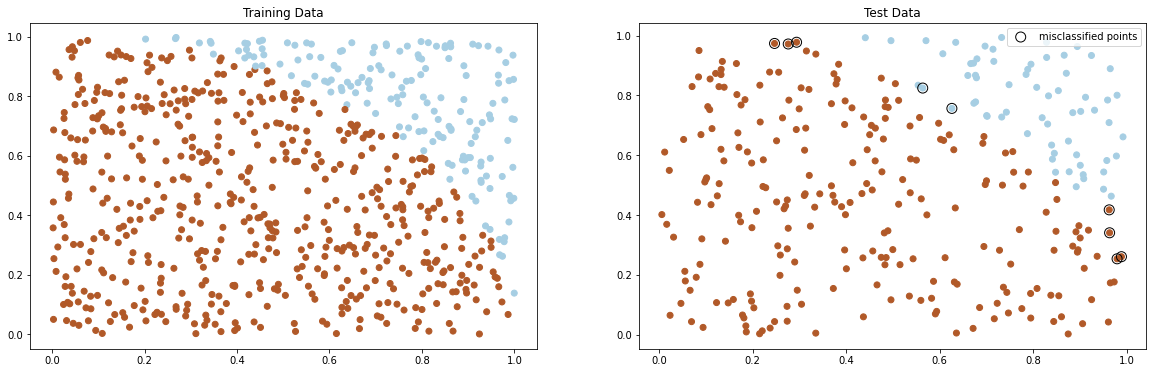

In [ ]:
# Plot training data + test data (with predictions)
fig, ax = plt.subplots(1, 2, figsize=(20,6))
ax[0].scatter(X_train[:, 0], X_train[:, 1], c=np.argmax(y_train, axis=1), cmap='Paired_r', label='fa')
ax[0].set_title("Training Data")
ax[1].scatter(X_test[:, 0], X_test[:, 1], c=y_pred, cmap='Paired_r')
ax[1].scatter(X_test[wrong_idx, 0], X_test[wrong_idx, 1], facecolors='none', edgecolors='black', s=100, label="misclassified points")
ax[1].set_title("Test Data")
ax[1].legend()